In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the datasets
price_data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\gpu_price_history.csv')
metadata = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\gpu_metadata.csv')

# Display the first few rows of each dataset
price_data.head(), metadata.head()

(       Date              Name  Retail Price  Used Price
 0  01-01-24  GeForce GTX 1050             0           0
 1  01-02-24  GeForce GTX 1050             0           0
 2  01-03-23  GeForce GTX 1050           192          61
 3  01-03-24  GeForce GTX 1050           254          52
 4  01-04-23  GeForce GTX 1050           181          55,
                      Name Wattage VRAM  3DMARK
 0        GeForce GTX 1050     75W  2GB    1861
 1     GeForce GTX 1050 Ti     75W  4GB    2356
 2        GeForce GTX 1060    120W  6GB    4215
 3        GeForce GTX 1650     75W  4GB    3552
 4  GeForce GTX 1660 SUPER    125W  6GB    6078)

In [2]:
# Convert 'Date' to datetime format
price_data['Date'] = pd.to_datetime(price_data['Date'], errors='coerce')

# Check for missing values
price_data.isnull().sum(), metadata.isnull().sum()

(Date            0
 Name            0
 Retail Price    0
 Used Price      0
 dtype: int64,
 Name       0
 Wattage    0
 VRAM       0
 3DMARK     0
 dtype: int64)

In [3]:
# Drop rows with missing 'Date' values
price_data.dropna(subset=['Date'], inplace=True)

# Merge datasets on 'Name'
merged_data = pd.merge(price_data, metadata, on='Name', how='inner')

# Display the first few rows of the merged dataset
merged_data.head()

,Date,Name,Retail Price,Used Price,Wattage,VRAM,3DMARK
0,2024-01-01,GeForce GTX 1050,0,0,75W,2GB,1861
1,2024-01-02,GeForce GTX 1050,0,0,75W,2GB,1861
2,2023-01-03,GeForce GTX 1050,192,61,75W,2GB,1861
3,2024-01-03,GeForce GTX 1050,254,52,75W,2GB,1861
4,2023-01-04,GeForce GTX 1050,181,55,75W,2GB,1861


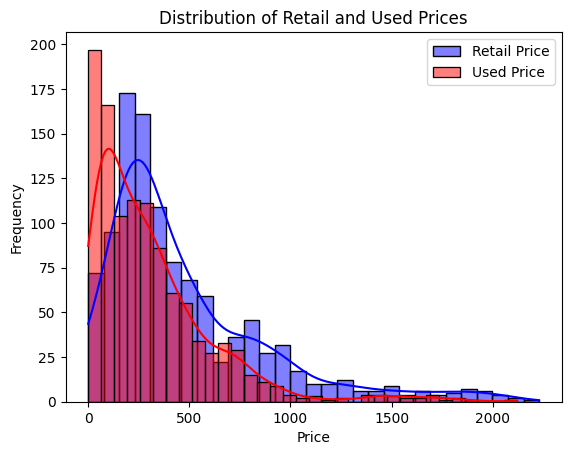

In [4]:
# Plotting the distribution of retail and used prices
sns.histplot(merged_data['Retail Price'], kde=True, color='blue', label='Retail Price')
sns.histplot(merged_data['Used Price'], kde=True, color='red', label='Used Price')
plt.legend()
plt.title('Distribution of Retail and Used Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

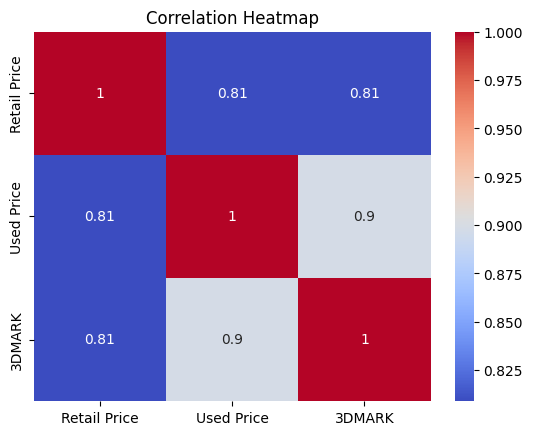

In [5]:
# Correlation heatmap for numeric features
numeric_df = merged_data.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = merged_data[['Retail Price', '3DMARK']]
y = merged_data['Used Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(19937.333095833685, 0.7945805563612462)